# Deep Learning Challenge

### In this module, we introduced the basics of deep learning and the fundamental architecture of the artificial neural networks. During the examples in the checkpoints, we used a MNIST dataset. In this challenge, you'll work with another dataset called fashion MNIST. Using this dataset, you need to:

1. Preprocess your data so that you can feed it into ANN models.
1. Split your data into training and test sets.
1. Try different ANN models and train them on your training set. You can play with: 
  1. Number of layers.
  1. Activation functions of the layers.
  1. Number of neurons in the layers.
  1. Different batch sizes during training.
1. Compare your models' training scores and interpret your results.
1. Evaluate your models' performances on your test set. Compare the results of your models.

### Lib imports and data load

In [10]:
from tqdm.notebook import tqdm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

### Preprocess your data so that you can feed it into ANN models.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128

### Split your data into training and test sets.

In [3]:
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

### Model - Test N-Layers Variability

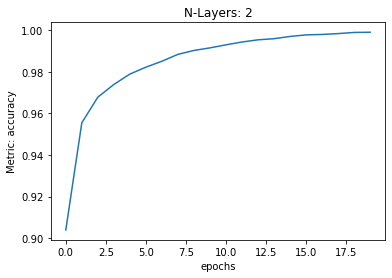

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.005829,0.08639
metrics: accuracy,0.998967,0.97760


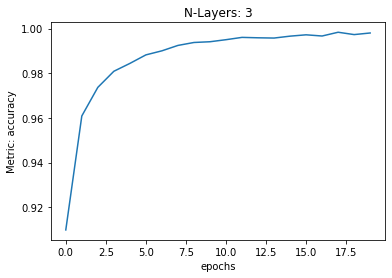

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.00360,0.098012
metrics: accuracy,0.99895,0.978800


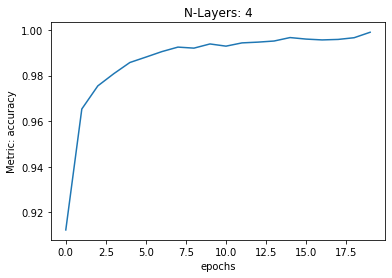

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.006453,0.097947
metrics: accuracy,0.997833,0.980200


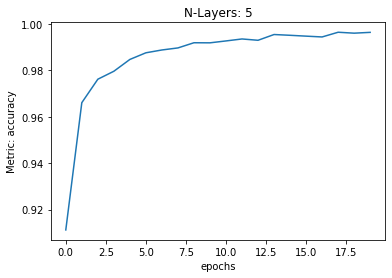

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.011142,0.116666
metrics: accuracy,0.996317,0.976800


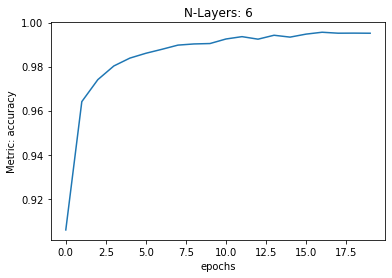

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
________________________________________________

None

,train-score,test-score
loss-function: categorical_crossentropy,0.029872,0.138697
metrics: accuracy,0.991000,0.971800


In [4]:
for n in range(5):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    for i in range(n):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"N-Layers: {n+2}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(model.summary(),
            scoredf)

<span style="color:blue">All models seem to be performing exceedingly well but with Layers=5 seems to be overfit the least of them all.</span>

### Model - Test Activation Functions

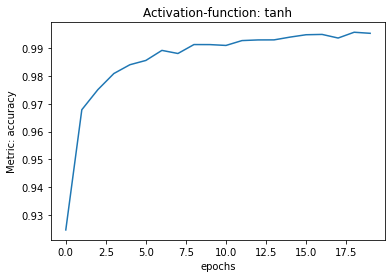

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 10)               

None

,train-score,test-score
loss-function: categorical_crossentropy,0.01255,0.096844
metrics: accuracy,0.99570,0.978500


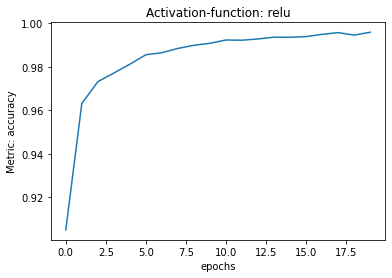

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 10)               

None

,train-score,test-score
loss-function: categorical_crossentropy,0.009021,0.113154
metrics: accuracy,0.997167,0.977000


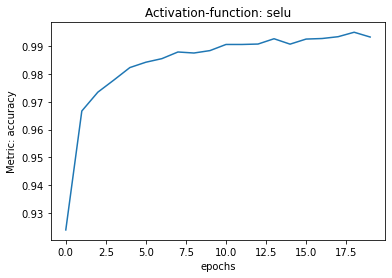

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 10)               

None

,train-score,test-score
loss-function: categorical_crossentropy,0.019239,0.109715
metrics: accuracy,0.993883,0.975100


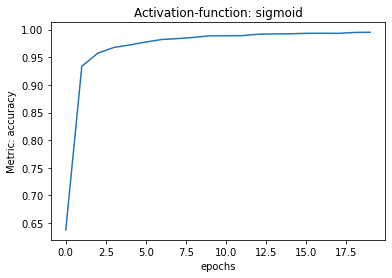

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

None

,train-score,test-score
loss-function: categorical_crossentropy,0.017523,0.123164
metrics: accuracy,0.994800,0.974300


In [7]:
for n in ['tanh', 'relu', 'selu', 'sigmoid']:
    model = Sequential()
    model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    for i in range(3):
        model.add(Dense(128, activation=n))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"Activation-function: {n}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(model.summary(),
            scoredf)

<span style="color:blue">All models perform pretty identically in terms of accuracy, however tanh had the lowest loss on the out-of-sample data</span>

### Model - Test Neuron Density

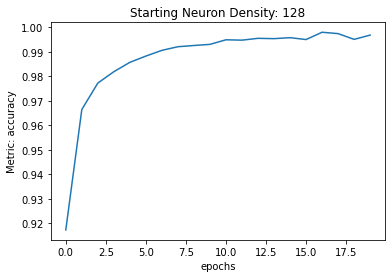

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 42)                2730      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                430       
Total params: 128,408
Trainable params: 128,408
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.011184,0.09175
metrics: accuracy,0.996233,0.97700


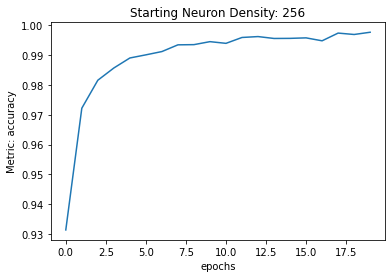

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_64 (Dense)             (None, 85)                10965     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                860       
Total params: 311,473
Trainable params: 311,473
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.018656,0.10504
metrics: accuracy,0.994200,0.97720


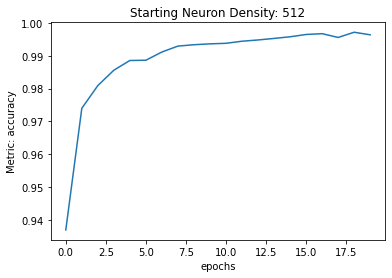

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_69 (Dense)             (None, 170)               43690     
_________________________________________________________________
dense_70 (Dense)             (None, 10)                1710      
Total params: 841,304
Trainable params: 841,304
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.011373,0.08583
metrics: accuracy,0.996400,0.98020


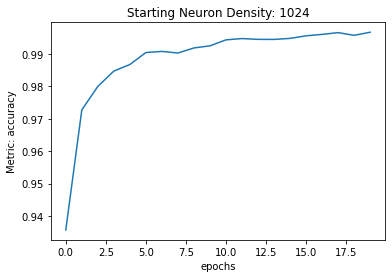

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_72 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_73 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_74 (Dense)             (None, 341)               174933    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                3420      
Total params: 2,556,593
Trainable params: 2,556,593
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.012105,0.09347
metrics: accuracy,0.996300,0.97980


In [8]:
for n in [128, 256, 512, 1024]:
    model = Sequential()
    model.add(Dense(n, input_shape=(input_dim,), activation='relu'))
    for i in range(3):
        j = n // (i+1)
        model.add(Dense(j, activation='tanh'))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"Starting Neuron Density: {n}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(model.summary(),
            scoredf)

<span style="color:blue">All models perform pretty identically in terms of accuracy, however starting neural density of 512 performs the best had the lowest loss on the out-of-sample data</span>

### Model - Test Batch Sizes

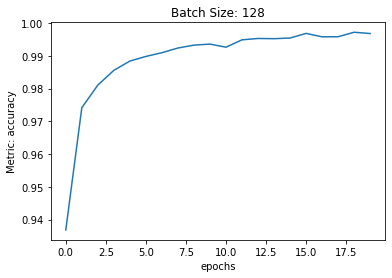

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_82 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_83 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_84 (Dense)             (None, 170)               43690     
_________________________________________________________________
dense_85 (Dense)             (None, 10)                1710      
Total params: 841,304
Trainable params: 841,304
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.009351,0.109672
metrics: accuracy,0.997000,0.978300


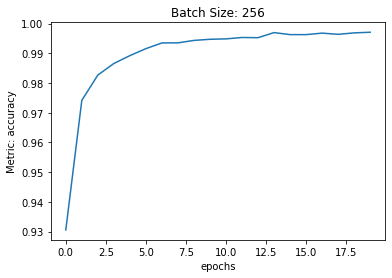

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_88 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_89 (Dense)             (None, 170)               43690     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1710      
Total params: 841,304
Trainable params: 841,304
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.013710,0.107765
metrics: accuracy,0.995417,0.977300


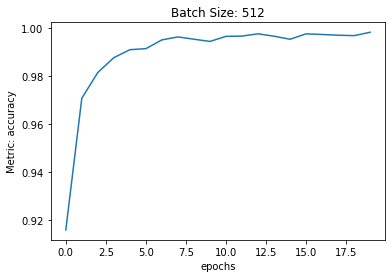

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_92 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_94 (Dense)             (None, 170)               43690     
_________________________________________________________________
dense_95 (Dense)             (None, 10)                1710      
Total params: 841,304
Trainable params: 841,304
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.00383,0.076015
metrics: accuracy,0.99895,0.981400


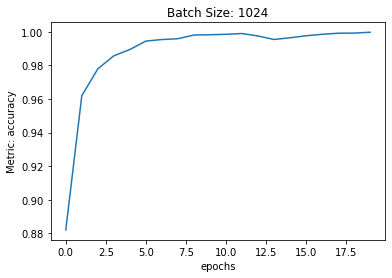

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_97 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_98 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_99 (Dense)             (None, 170)               43690     
_________________________________________________________________
dense_100 (Dense)            (None, 10)                1710      
Total params: 841,304
Trainable params: 841,304
Non-trainable params: 0
_________________________________________________________________


None

,train-score,test-score
loss-function: categorical_crossentropy,0.000862,0.078399
metrics: accuracy,0.999833,0.982400


In [12]:
for m in [128, 256, 512, 1024]:
    n = 512
    model = Sequential()
    model.add(Dense(n, input_shape=(input_dim,), activation='relu'))
    for i in range(3):
        j = n // (i+1)
        model.add(Dense(j, activation='tanh'))
    model.add(Dense(output_dim, activation='softmax'))

    mtrcs = ['accuracy']
    loss_fn = 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=loss_fn, metrics=mtrcs)
    history = model.fit(X_train, Y_train, batch_size=m, epochs=20, verbose=0)

    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, Y_test, verbose=0)

    scoredf = pd.DataFrame(index=[f"loss-function: {loss_fn}"] + ["metrics: " + i for i in mtrcs], 
                           columns=['train-score', 'test-score'])
    scoredf['train-score'] = train_score
    scoredf['test-score'] = test_score
    plt.plot(history.history[mtrcs[0]])
    plt.title(f"Batch Size: {m}")
    plt.ylabel(f"Metric: {mtrcs[0]}")
    plt.xlabel("epochs")
    plt.show()
    display(model.summary(),
            scoredf)

<span style="color:blue">All models perform pretty identically in terms of accuracy, however batch size of 512 performs the better than 128 and 256 without the apparent overfitting we see in 1024</span>

### Conclusion

<span style="color:blue">The entire iterative process from the beginning used the analysis of the performance on accuracy and score of the loss function comparing the the training scores to the validation scores.  The structure of the challenge has manually optimizing these parameters one at a time, where we may want to use gridsearch or some similar loops to validate all combinations rather than one variable at a time.  The manual optimization is not a pure check of highest accuracy (for fear of overfitting), nor is it a just a pure loss minimization.  Selection of the "optimal" parameter would also includes and is maybe more dependant on the model's performance with out of sample data.  Perhaps this is not the best dataset to highlight the process since accuracy remained incredibly high for all trained models, even with the validation set.  We also saw convergance with all of our models, perhaps with a lower number of epochs we could accent how quickly certain parameters let the model converge and reach acceptable thresholds of accuracy and loss score.</span>